<a href="https://colab.research.google.com/github/MoksedurRahman/Extract_table_From_Img_Doc_Colab/blob/main/layout_parser_Extract_Title_Text_Images_Table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U layoutparser

     |████████████████████████████████| 19.2 MB 652 kB/s 
     |████████████████████████████████| 46 kB 4.8 MB/s 
     |████████████████████████████████| 596 kB 59.6 MB/s 
     |████████████████████████████████| 5.6 MB 45.1 MB/s 
     |████████████████████████████████| 4.3 MB 38.8 MB/s 
     |████████████████████████████████| 139 kB 43.4 MB/s 
     |████████████████████████████████| 3.6 MB 39.0 MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.6.0-py3-none-any.whl size=33688 sha256=184152dfc4e2625b4932b70688113c0f4dab65b58402257d69bbea5fd59bf581
  Stored in directory: /root/.cache/pip/wheels/58/56/fe/2e93d842ffa9ea97746c1ab253d43502ed61c0689361a0224e
Successfully built pdfplumber
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [1]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-wtqtn1jy/detectron2_b120f3202a3b448d831a2fe46c4d052b
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-wtqtn1jy/detectron2_b120f3202a3b448d831a2fe46c4d052b
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
     |████████████████████████████████| 47 kB 2.5 MB/s 
     |████████████████████████████████| 74 kB 2.8 MB/s 
     |████████████████████████████████| 112 kB 57.2 MB/s 
  Created wheel for detectron2: filename=detectron2-0.4-cp37-cp37m-linux_x86_64.whl size=5282332 sha256=e013a42953ec93953c5cdc7efa33e0e61564767a3e446924a6c1e9844a3f20b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-_bdlp3u3/wheels/87/3f/26/dc45098d34763c9dc05ea3ab35c6dec6e9e8c16ac741efb741
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-py3-none-any.whl size=58542 sha256=74a2adc7ce90862a9719f19442560a9fd9de7cfdd28c318cbf8ae42a6

In [2]:
!pip install layoutparser[ocr]

     |████████████████████████████████| 435 kB 7.7 MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14070 sha256=99f9da613b5370b0fb271b8be0fd33a9fdee4126bb074153d0d105c2f434aea9
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [1]:
!git clone https://github.com/Layout-Parser/layout-parser.git

Cloning into 'layout-parser'...
remote: Enumerating objects: 1322, done.
remote: Counting objects: 100% (828/828), done.
remote: Compressing objects: 100% (458/458), done.
remote: Total 1322 (delta 474), reused 610 (delta 303), pack-reused 494
Receiving objects: 100% (1322/1322), 63.94 MiB | 27.48 MiB/s, done.
Resolving deltas: 100% (703/703), done.


In [2]:
%cd layout-parser/

/content/layout-parser


In [3]:
import cv2
image = cv2.imread("/content/layout-parser/examples/data/paper-image.jpg")
image = image[..., ::-1]

config.yaml?dl=1: 8.19kB [00:01, 7.24kB/s]
model_final.pth?dl=1: 856MB [00:10, 79.8MB/s]                          
/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:101: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


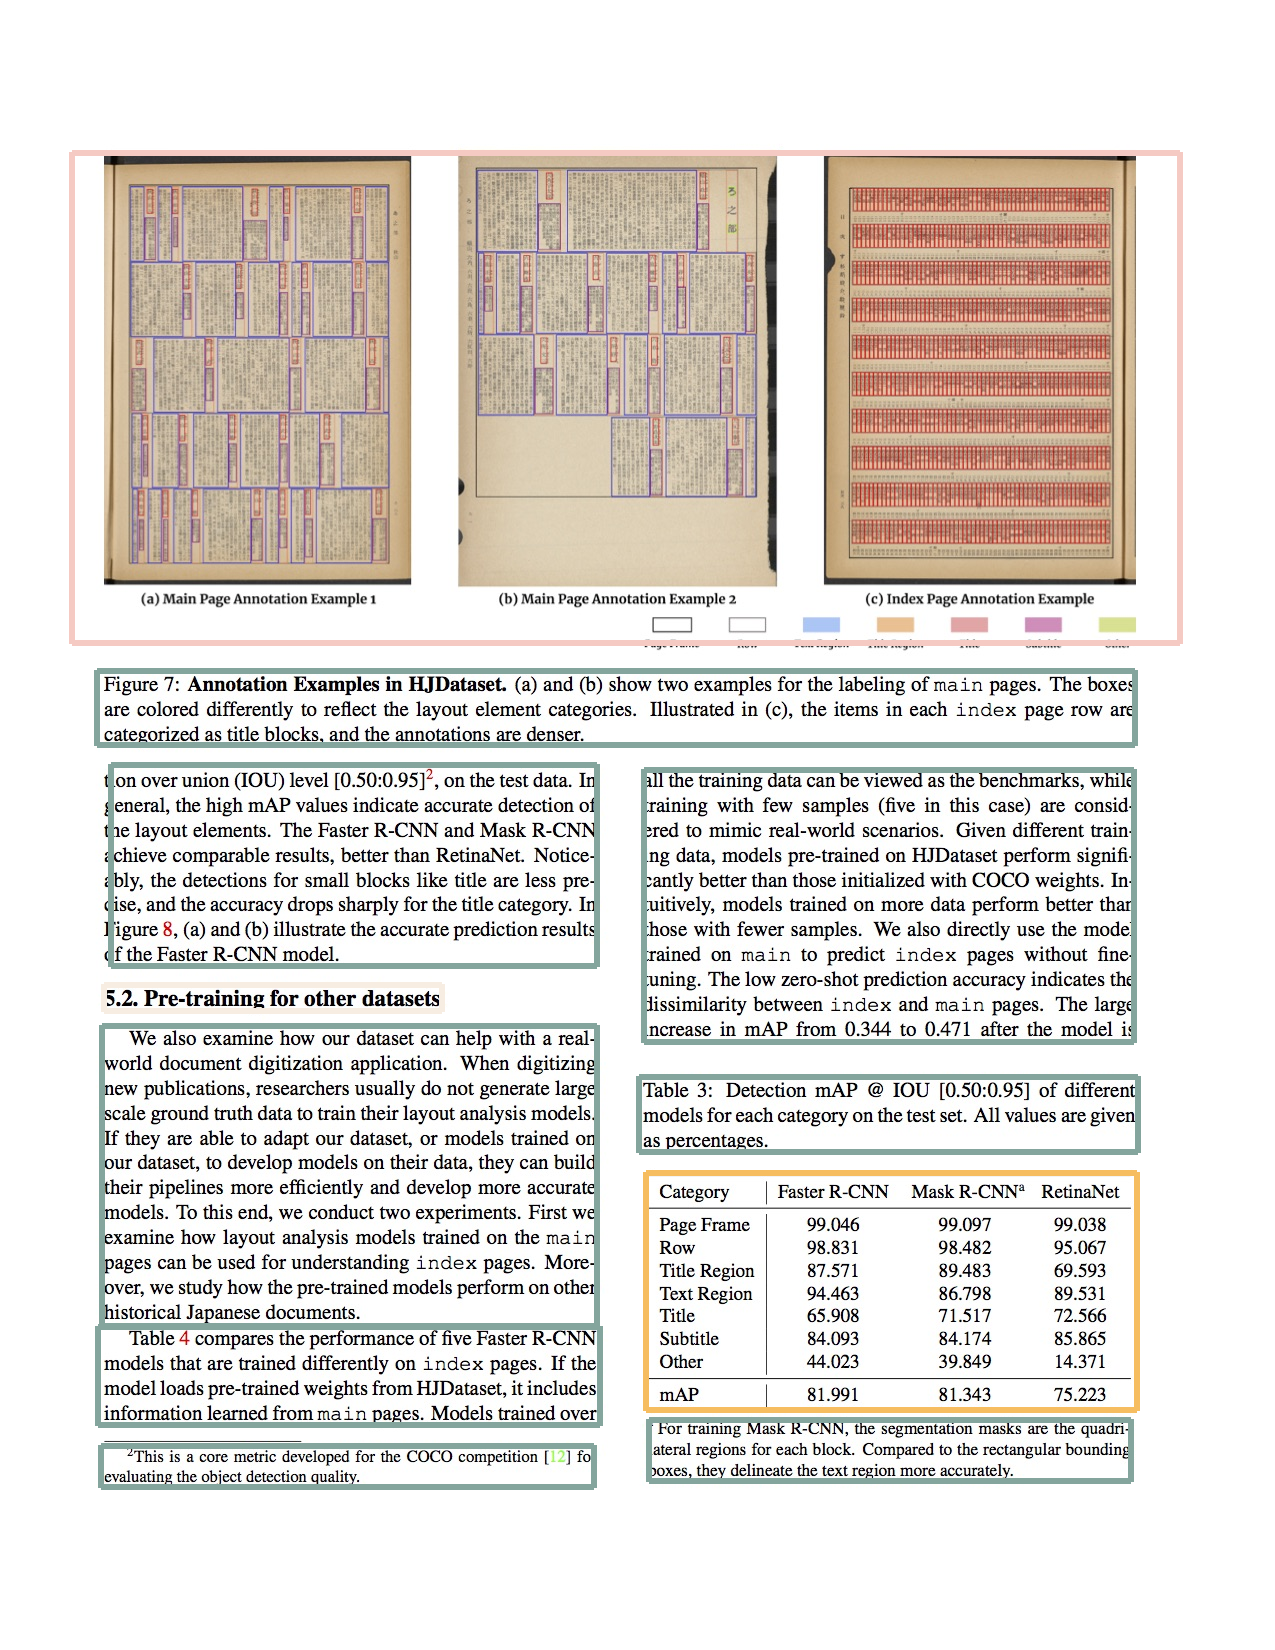

In [4]:
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)
lp.draw_box(image, layout,)

In [5]:
text_blocks = lp.Layout([b for b in layout if b.type=="Title"])
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=104.18395233154297, y_1=984.3191528320312, x_2=441.509521484375, y_2=1011.412841796875), text=None, id=None, type=Title, parent=None, next=None, score=0.9871368408203125)], page_data={})

In [6]:
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [7]:
figure_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=72.328857421875, y_1=152.1854705810547, x_2=1179.6295166015625, y_2=643.6031494140625), text=None, id=None, type=Figure, parent=None, next=None, score=0.9979683756828308)], page_data={})

In [8]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [9]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

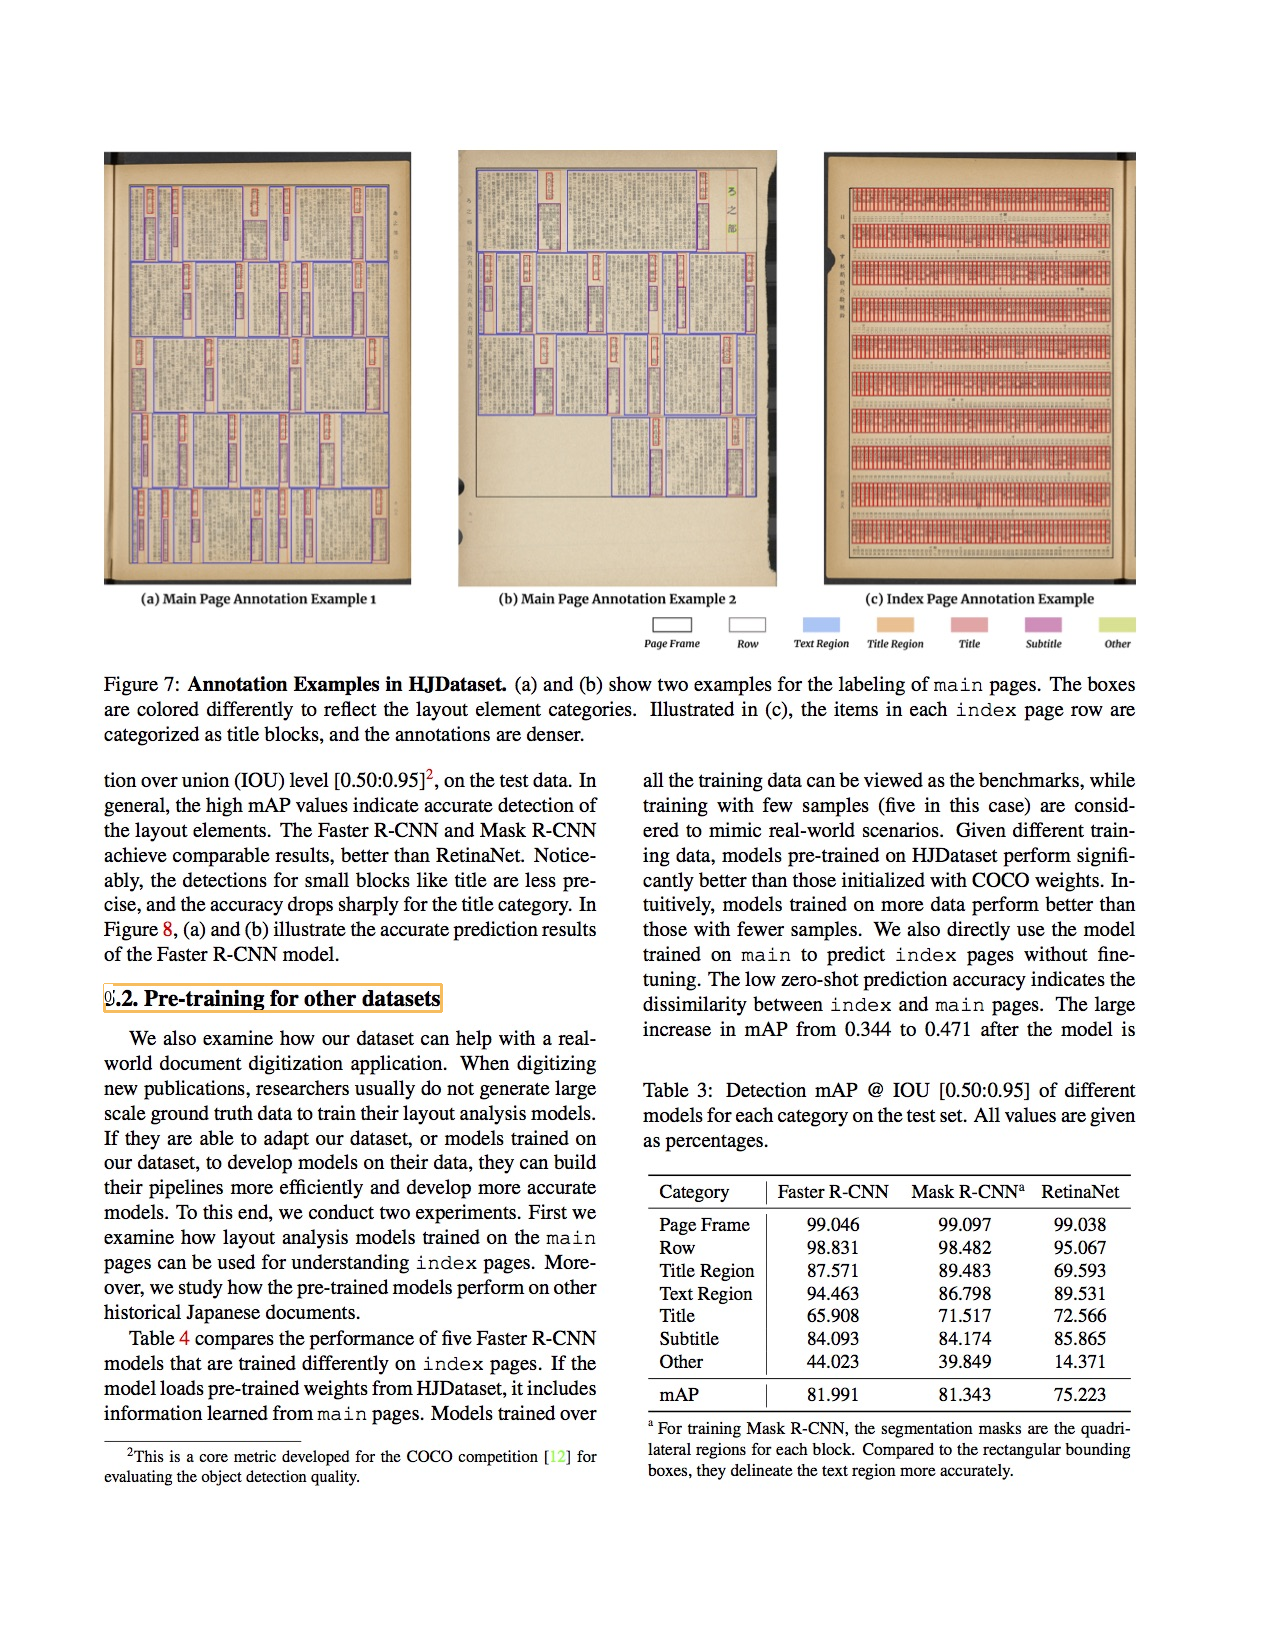

In [10]:
lp.draw_box(image, text_blocks,
            box_width=3, 
            show_element_id=True)

In [11]:
ocr_agent = lp.TesseractAgent(languages='eng') 
    # Initialize the tesseract ocr engine. You might need 
    # to install the OCR components in layoutparser:
    # pip install layoutparser[ocr]

In [12]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,761 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [13]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness 
        
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [14]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

5.2. Pre-training for other datasets

---


In [15]:
text_blocks.get_texts()

['5.2. Pre-training for other datasets\n\x0c']

In [16]:
for block in text_blocks:
  print(block)

TextBlock(block=Rectangle(x_1=104.18395233154297, y_1=984.3191528320312, x_2=441.509521484375, y_2=1011.412841796875), text=5.2. Pre-training for other datasets
, id=0, type=Title, parent=None, next=None, score=0.9871368408203125)


In [17]:
!pip install spacy

In [18]:
!pip install spacy-transformers
!python -m spacy download en_core_web_trf

     |████████████████████████████████| 51 kB 120 kB/s 
     |████████████████████████████████| 3.4 MB 14.6 MB/s 
     |████████████████████████████████| 6.0 MB 35.8 MB/s 
     |████████████████████████████████| 1.1 MB 40.9 MB/s 
     |████████████████████████████████| 451 kB 46.2 MB/s 
     |████████████████████████████████| 10.1 MB 43.4 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 628 kB 58.9 MB/s 
     |████████████████████████████████| 181 kB 57.7 MB/s 
     |████████████████████████████████| 3.3 MB 36.9 MB/s 
     |████████████████████████████████| 67 kB 5.7 MB/s 
     |████████████████████████████████| 895 kB 48.3 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0

In [19]:
!pip install click==7.1.1

     |████████████████████████████████| 82 kB 1.2 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2


In [20]:
import spacy
nlp = spacy.load("en_core_web_trf")

In [21]:
sentence=["".join(txt) for txt in text_blocks.get_texts()]

In [22]:
".".join(sentence)

'5.2. Pre-training for other datasets\n\x0c'

In [23]:
doc = nlp(".".join(sentence))
for ent in doc.ents:
  print(ent.text,ent.label_)

5.2. CARDINAL


/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
